# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/tensorflow.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [1]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

##Especificando la versión de TensorFlow

Ejecutando "importar tensorflow" importará la versión por defecto (actualmente 2.x). Puedes usar la 1.x ejecutando una celda con la "versión mágica de tensorflow" **antes de ejecutar "importar tensorflow".

### Si no funciona hacer el pip install


In [2]:
#!pip install tensorflow==1.14
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Importar Tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.2


In [4]:
session = tf.Session()

# Caso de regresión

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [6]:
x_vals = np.random.normal(1.0, 0.1, 200)
y_vals = np.repeat(10.0, 200)

x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

batch_size = 25

In [7]:
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8),replace=False)

In [8]:
train_idx

array([ 97,  12, 121,  41,  61, 198, 190, 100, 199,  24,  45,  94, 193,
       157,  31, 107, 156, 135, 130,   5,  35, 148, 151, 134, 194,  14,
       127, 154,  90,  84,   2, 144,  39,  32, 184, 152,  67, 115,  54,
       189,  47, 106,  22, 105, 112, 175, 102,  63, 155, 147,  36,  52,
        40, 139, 150,  96, 110, 174,  16,  43,  66, 126,  46,  88, 117,
       166,  10, 140, 133,  91, 136,  83,  27,  99, 120,  13,  53,  64,
        98, 187,  75, 182,  20,  71,   7, 165, 183, 188, 123,  74, 173,
        65,  85, 146,  49, 103,  68, 168,  69,  79,   8, 163, 119,  72,
       145, 180,  93,  37, 170,   6,  55,   4, 118,   9,  44,  57, 111,
        34,   0, 143, 114,  18, 171, 176,  30, 161, 195, 137, 104,  42,
        95, 141,  21,  11,  73, 113,  17, 192, 116,  82,  87,  76,   1,
        51,   3,  56, 108,  92,  81, 138, 128, 131, 162,  26, 167, 181,
        78,  28,  62, 158])

In [9]:
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [10]:
test_idx

array([129, 132, 142,  15,  19, 149,  23,  25, 153,  29, 159, 160,  33,
       164,  38, 169, 172,  48, 177,  50, 178, 179, 185,  58,  59,  60,
       186, 191, 196, 197,  70,  77,  80,  86,  89, 101, 109, 122, 124,
       125])

In [11]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [12]:
my_prediction = tf.matmul(x_data, A)
loss = tf.reduce_mean(tf.square(my_prediction-y_target))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = my_optim.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

In [13]:
for i in range(200):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_idx]])
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    if (i+1)%20==0:
        print('Paso #'+str(i+1)+ ", A="+str(session.run(A))+", Loss ="+
              str(session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})))

Paso #20, A=[[5.481493]], Loss =20.154736
Paso #40, A=[[7.951936]], Loss =4.6937103
Paso #60, A=[[9.019494]], Loss =1.694028
Paso #80, A=[[9.515437]], Loss =1.2979201
Paso #100, A=[[9.67077]], Loss =1.0891398
Paso #120, A=[[9.784968]], Loss =1.801633
Paso #140, A=[[9.826122]], Loss =1.4360211
Paso #160, A=[[9.846118]], Loss =0.9284189
Paso #180, A=[[9.872354]], Loss =0.88420653
Paso #200, A=[[9.85401]], Loss =0.83248764


#### Evaluación del modelo con MSE

In [14]:
mse_train = session.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
mse_test = session.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
print("MSE en el conjunto de entrenamiento "+str(np.round(mse_train, 3)))
print("MSE en el conjunto de testing "+str(np.round(mse_test, 3)))

MSE en el conjunto de entrenamiento 0.972
MSE en el conjunto de testing 1.046


# Caso de clasificación

In [15]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [16]:
batch_size = 25
x_vals = np.concatenate((np.random.normal(-2,1,100), np.random.normal(2,1,100)))
y_vals = np.concatenate((np.repeat(0.0, 100), np.repeat(1.0,100)))

x_data = tf.placeholder(shape=[1,None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1,None], dtype = tf.float32)

In [17]:
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [18]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [19]:
my_prediction = tf.add(x_data, A)
init = tf.global_variables_initializer()
session.run(init)

In [20]:
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_prediction, labels=y_target))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_step = my_optim.minimize(xentropy)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
for i in range(2000):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_idx]]
    rand_y = [y_vals_train[rand_idx]]
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+", A = "+str(session.run(A))+
             "Loss = "+str(session.run(xentropy, feed_dict={x_data: rand_x, y_target:rand_y})))

Paso #100, A = [7.4133763]Loss = 2.770218
Paso #200, A = [5.151876]Loss = 1.2969798
Paso #300, A = [3.1860955]Loss = 0.6271861
Paso #400, A = [1.8424941]Loss = 0.43281788
Paso #500, A = [1.0733563]Loss = 0.16931373
Paso #600, A = [0.6632928]Loss = 0.17186055
Paso #700, A = [0.39850894]Loss = 0.15941544
Paso #800, A = [0.23690085]Loss = 0.13279936
Paso #900, A = [0.1516972]Loss = 0.18727393
Paso #1000, A = [0.13098848]Loss = 0.16112445
Paso #1100, A = [0.1146476]Loss = 0.15355343
Paso #1200, A = [0.09206461]Loss = 0.20157658
Paso #1300, A = [0.07863934]Loss = 0.15408449
Paso #1400, A = [0.06676366]Loss = 0.15899839
Paso #1500, A = [0.05774665]Loss = 0.16127124
Paso #1600, A = [0.04599117]Loss = 0.13358898
Paso #1700, A = [0.06700746]Loss = 0.21750745
Paso #1800, A = [0.07839369]Loss = 0.17875454
Paso #1900, A = [0.09060813]Loss = 0.17815506
Paso #2000, A = [0.0842086]Loss = 0.17414902


#### Evaluar el modelo con la precisión (Accuracy)

In [22]:
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [23]:
acc_train = session.run(accuracy, feed_dict={x_data:[x_vals_train], y_target: [y_vals_train]})
acc_test = session.run(accuracy, feed_dict={x_data:[x_vals_test], y_target: [y_vals_test]})

In [24]:
print("Precisión en el conjunto de entrenamiento: "+str(acc_train))
print("Precisión en el conjunto de testing: "+ str(acc_test))

Precisión en el conjunto de entrenamiento: 0.975
Precisión en el conjunto de testing: 0.975


#### Visualización de los modelos

In [25]:
A_result = session.run(A)
A_result

array([0.0842086], dtype=float32)

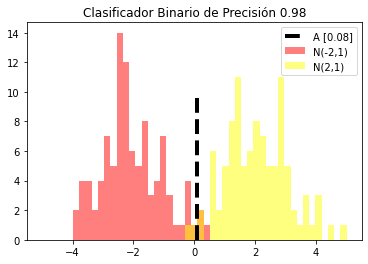

In [26]:
bins = np.linspace(-5,5,50)
plt.hist(x_vals[0:100], bins, alpha=0.5, label = "N(-2,1)", color="red")
plt.hist(x_vals[100:200], bins, alpha=0.5, label="N(2,1)", color="yellow")
plt.plot((A_result, A_result), (0, 10), "k--", linewidth = 4, label = "A "+str(np.round(A_result,2)))
plt.legend(loc="upper right")
plt.title("Clasificador Binario de Precisión "+str(np.round(acc_train,2)))
plt.show()